# Imports 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import warnings
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
warnings.filterwarnings('ignore')
plt.style.use('ggplot') #https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
%matplotlib inline

D:\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\anaconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Data setup

In [2]:
data_bench = pd.read_pickle("data/course_and_uni_1819.pkl")
data_covid = pd.read_pickle("data/course_and_uni_2122.pkl")

#drop not needed columns - no point in keeping uni and course as we don't have future data (duh)
data_bench.drop(["uni","course"],inplace = True, axis = "columns")
data_covid.drop(["uni","course"], inplace = True, axis = "columns")

<AxesSubplot: title={'center': '2021-2022'}>

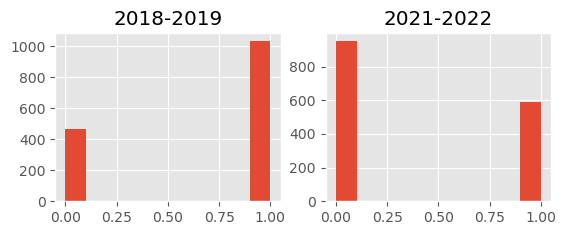

In [3]:
data_bench.Q27 = data_bench.Q27.apply(lambda x: 1 if x >= 0.8 else 0)
plt.subplot(2,2,1)
plt.title("2018-2019")
data_bench.Q27.hist()

data_covid.Q27 = data_covid.Q27.apply(lambda x: 1 if x >= 0.8 else 0)
plt.subplot(2,2,2)
plt.title("2021-2022")
data_covid.Q27.hist()

In [6]:
#split data
x_train_bench, x_test_bench, y_train_bench, y_test_bench = train_test_split(data_bench.iloc[:,:26], data_bench.iloc[:,26], test_size=0.25, stratify= data_bench.iloc[:,26], shuffle = True, random_state=661)
x_train_covid, x_test_covid, y_train_covid, y_test_covid = train_test_split(data_covid.iloc[:,:26], data_covid.iloc[:,26], test_size=0.25, stratify = data_covid.iloc[:,26], shuffle = True, random_state=661)
x_train_bench

,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q10,...,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26
894,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,...,1.000000,0.857850,0.92895,1.000000,0.92895,0.92895,0.928950,1.000000,0.899550,0.822900
406,0.942075,0.902800,0.898350,0.902825,0.914575,0.910075,0.850900,0.82350,0.792775,0.79030,...,0.843300,0.868475,0.88945,0.858125,0.77160,0.89800,0.874775,0.818900,0.714600,0.620600
1323,0.919600,0.896650,0.945050,0.837300,0.913450,0.877850,0.772050,0.72720,0.815350,0.79175,...,0.808650,0.736250,0.86480,0.841400,0.68800,0.71785,0.826900,0.759550,0.537750,0.286550
738,0.858350,0.757550,0.817400,0.789800,0.841150,0.866750,0.783100,0.86945,0.816500,0.76365,...,0.774600,0.922200,0.90010,0.891650,0.74130,0.88095,0.836600,0.778100,0.732200,0.622800
25,0.660700,0.666650,0.511900,0.482150,0.541650,0.815500,0.851200,0.66070,0.738100,0.54165,...,0.596150,0.541650,0.72435,0.773800,0.39285,0.80950,0.654800,0.434500,0.315500,0.348450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.937350,0.925550,0.851050,0.842900,0.846050,0.856050,0.842900,0.79055,0.837900,0.73660,...,0.664750,0.777300,0.91120,0.796050,0.76160,0.85420,0.834200,0.826050,0.729200,0.635825
1145,0.905850,0.841200,0.904700,0.786250,0.855150,0.855150,0.725350,0.70405,0.740100,0.65805,...,0.787150,0.880750,0.88720,0.907950,0.62825,0.79520,0.885050,0.744850,0.505850,0.460350
1159,0.916225,0.905925,0.898125,0.864850,0.878050,0.899450,0.886125,0.79560,0.778125,0.79280,...,0.794275,0.851200,0.85555,0.836500,0.82980,0.88785,0.876100,0.831275,0.677725,0.548400
1416,0.908825,0.837400,0.823100,0.834625,0.898775,0.868975,0.820925,0.76485,0.770200,0.87055,...,0.802025,0.830675,0.89745,0.847200,0.71805,0.91215,0.897350,0.828000,0.728650,0.575075


# Algorithms

In [7]:
def get_scores(clf, x_test, y_test):
    preds = clf.best_estimator_.predict(x_test)
    acc = clf.best_estimator_.score(x_test_bench, y_test_bench)
    print(f"Accuracy: {acc:.3f}")
    print(f"F1 score: {f1_score(y_test, preds):.3f}")

    scores = cross_val_score(clf.best_estimator_, x_test, y_test, cv=10)
    print(f"CV train score: {clf.best_score_:.3f}")
    print(f"CV test score: {scores.mean():.3f}")

    cm = metrics.confusion_matrix(y_test, preds)
    print(cm)
    sns.heatmap(cm, cmap = "Blues", annot=True, fmt='d')
    print(f"Best params: {clf.best_params_}")

#### Logistic regression 

Accuracy: 0.864
F1 score: 0.901
CV train score: 0.894
CV test score: 0.861
[[ 91  26]
 [ 25 233]]
Best params: {'C': 0.001, 'penalty': 'none', 'solver': 'lbfgs'}
Wall time: 9.06 s


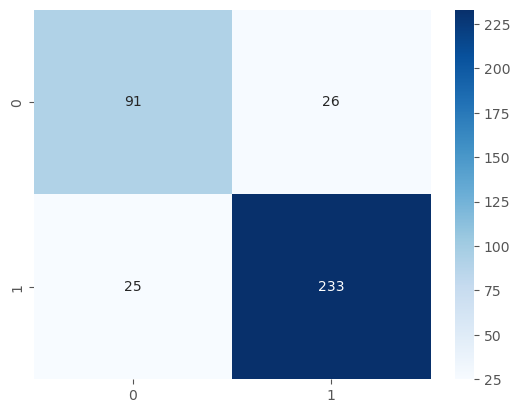

In [9]:
%%time

params_logreg = dict(C = [0.001, 0.01, 0.1], penalty = ['l2', 'l1' ,'none'], solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
gridsearch_logregb = GridSearchCV(LogisticRegression(random_state = 661), params_logreg, cv = 10)
gridsearch_logregb.fit(x_train_bench, y_train_bench)

#get metrics
get_scores(gridsearch_logregb, x_test_bench, y_test_bench)

Accuracy: 0.867
F1 score: 0.852
CV train score: 0.902
CV test score: 0.886
[[219  19]
 [ 24 124]]
Best params: {'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg'}
Wall time: 9.05 s


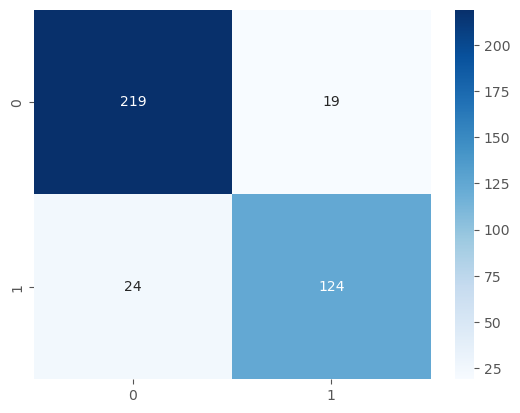

In [10]:
%%time

params_logreg = dict(C = [0.001, 0.01, 0.1], penalty = ['l2', 'l1' ,'none'], solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
gridsearch_logregc = GridSearchCV(LogisticRegression(random_state = 661), params_logreg, cv = 10)
gridsearch_logregc.fit(x_train_covid, y_train_covid)

#get metrics
get_scores(gridsearch_logregc, x_test_covid, y_test_covid)

#### Decision tree

Accuracy: 0.813
F1 score: 0.866
CV train score: 0.860
CV test score: 0.765
[[ 79  38]
 [ 32 226]]
Best params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Wall time: 25.5 s


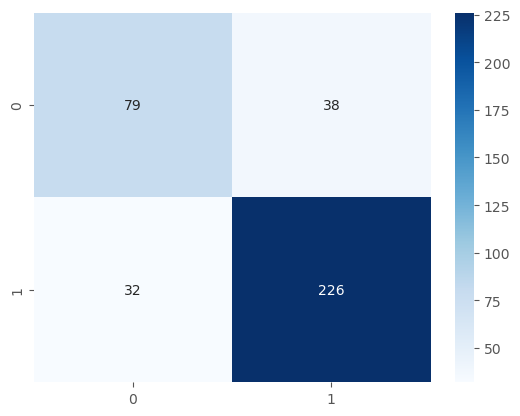

In [11]:
%%time

params_tree = dict(min_samples_split = range(1,10) , max_depth = range(1,10), criterion = ["gini", "entropy", "log_loss"])
gridsearch_dtreeb = GridSearchCV(tree.DecisionTreeClassifier(random_state = 661), params_tree, cv = 10)
gridsearch_dtreeb.fit(x_train_bench, y_train_bench)

#get metrics
get_scores(gridsearch_dtreeb, x_test_bench, y_test_bench)

Accuracy: 0.800
F1 score: 0.812
CV train score: 0.875
CV test score: 0.826
[[206  32]
 [ 25 123]]
Best params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Wall time: 25.2 s


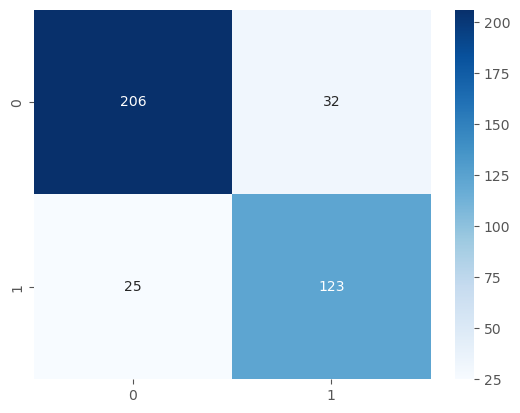

In [12]:
%%time

params_tree = dict(min_samples_split = range(1,10) , max_depth = range(1,10), criterion = ["gini", "entropy", "log_loss"])
gridsearch_dtreec = GridSearchCV(tree.DecisionTreeClassifier(random_state = 661), params_tree, cv = 10)
gridsearch_dtreec.fit(x_train_covid, y_train_covid)

#get metrics
get_scores(gridsearch_dtreec, x_test_covid, y_test_covid)

In [13]:
#save actual dt for analysis
dot_data = tree.export_graphviz(gridsearch_dtreeb.best_estimator_, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("dtreeb")

dot_data = tree.export_graphviz(gridsearch_dtreec.best_estimator_, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("dtreec") 

'dtreec.pdf'

#### Random forest

Accuracy: 0.875
F1 score: 0.912
CV train score: 0.884
CV test score: 0.858
[[ 85  32]
 [ 15 243]]
Best params: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Wall time: 44.3 s


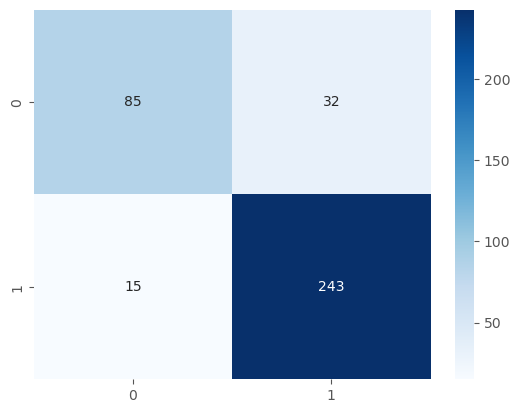

In [14]:
%%time

params_rf = dict(min_samples_split = range(1,3) , max_depth = range(1,5), bootstrap = [True, False], criterion = ["gini", "entropy"])
gridsearch_rfb = GridSearchCV(RandomForestClassifier(random_state = 661), params_rf, cv = 10)
gridsearch_rfb.fit(x_train_bench, y_train_bench)

#get metrics
get_scores(gridsearch_rfb, x_test_bench, y_test_bench)

Accuracy: 0.851
F1 score: 0.846
CV train score: 0.894
CV test score: 0.889
[[217  21]
 [ 24 124]]
Best params: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}
Wall time: 43 s


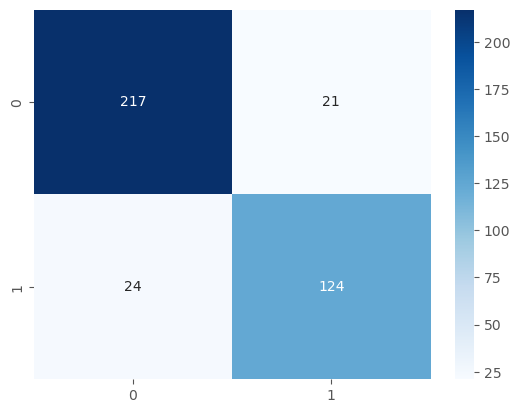

In [15]:
%%time

params_rf = dict(min_samples_split = range(1,3) , max_depth = range(1,5), bootstrap = [True, False], criterion = ["gini", "entropy"])
gridsearch_rfc = GridSearchCV(RandomForestClassifier(random_state = 661), params_rf, cv = 10)
gridsearch_rfc.fit(x_train_covid, y_train_covid)

#get metrics
get_scores(gridsearch_rfc, x_test_covid, y_test_covid)

#### Artificial neural network